## **Marketing Analytics**

PRABU JEYABALAN

DATE: 11/15/2024

**Handling Time Series Data & Modeling with an Interaction Term**

**A. Pick any publicly-traded company that trades on the Nasdaq or the NYSE.**

**a. What company did you select, and what is its ticker symbol? Why did
you pick this company?**


*I chose Nvidia Corporation, with the ticker symbol NVDA, as my company. This year 2024 Nvidia has been known for its high volatility, mainly due to its strong ties to the semiconductor and AI sectors. The stock saw big swings influenced by the global demand for GPUs major advancements in AI technology and ongoing supply chain issues affecting the entire industry. What makes Nvidia especially interesting is how it balances incredible growth potential being a leader in AI and data centers while facing challenges like market saturation and geopolitical pressures. Looking into Nvidia’s performance gives me a great way to understand how external market factors and industry trends can impact stock prices.*


**B. Go to the Nasdaq homepage: www.nasdaq.com. Enter your company’s ticker
symbol in “Symbol Search” area near the top of your screen. Next, click on
“Historical Quotes” and adjust the settings so that it shows one year’s worth of
share price data. Then, click on “Download Historical Data” to download this
data as a CSV.**

**C. Bring the dataset into your environment. For this step, bring the dataset into
your environment using read_csv() from pandas -- but now, add some extra
parameters to that function: index_col= ‘Date’ and parse_dates=True.**

**a. Use the head() function to explore the variables, and show your results.**

**b. Rename the ‘Close/Last’ column to ‘Close’.**

**c. Next, call the info() function on your dataset, and show your results.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.formula.api as smf
import matplotlib.dates as mdates

In [ ]:
nvda = pd.read_csv('/content/HistoricalData NVDA.csv', index_col= 'Date', parse_dates=True)

In [ ]:
nvda.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-11-11,$145.26,182325600,$148.68,$148.85,$143.57
2024-11-08,$147.63,175665800,$148.77,$149.77,$146.26
2024-11-07,$148.88,207323300,$146.39,$148.93,$146.17
2024-11-06,$145.61,242043900,$142.96,$146.49,$141.96
2024-11-05,$139.91,160537400,$137.45,$140.3701,$137.33


In [ ]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-11-11 to 2023-11-13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  251 non-null    object
 1   Volume      251 non-null    int64 
 2   Open        251 non-null    object
 3   High        251 non-null    object
 4   Low         251 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.8+ KB


In [ ]:
nvda = nvda.rename(columns={'Close/Last': 'Close'})
# Removing the dollar sign from columns containing it
for column in ['Close', 'Open', 'High', 'Low']:
    nvda[column] = nvda[column].replace({'\$': ''}, regex=True).astype(float)

In [ ]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-11-11 to 2023-11-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   251 non-null    float64
 1   Volume  251 non-null    int64  
 2   Open    251 non-null    float64
 3   High    251 non-null    float64
 4   Low     251 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


**D. Is this dataframe indexed by time values? How do you know this?**

*From the info function output, I could see its clearly mentioned on top that "DatetimeIndex: 251 entries, 2024-11-11 to 2023-11-13" which confirms that this dataframe is indexed by time values.*

**E. In your Jupyter Notebook, view the index attribute of your time series.**



In [ ]:
nvda.index

DatetimeIndex(['2024-11-11', '2024-11-08', '2024-11-07', '2024-11-06',
               '2024-11-05', '2024-11-04', '2024-11-01', '2024-10-31',
               '2024-10-30', '2024-10-29',
               ...
               '2023-11-27', '2023-11-24', '2023-11-22', '2023-11-21',
               '2023-11-20', '2023-11-17', '2023-11-16', '2023-11-15',
               '2023-11-14', '2023-11-13'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

**a. Now, view the max and min value of your index attribute**

In [ ]:
print(nvda.index.max())
print(nvda.index.min())

2024-11-11 00:00:00
2023-11-13 00:00:00


**b. Now, view the argmax and argmin values of your index attribute.**

In [ ]:
print(nvda.index.argmax())
print(nvda.index.argmin())

0
250


**c. What do the results of max, min, argmax, and argmin represent?**


***max***: *Represents the latest date (maximum date value) in the DatetimeIndex of the nvda DataFrame.  It returns the actual maximum date.*

***min***: *Represents the earliest date (minimum date value) in the DatetimeIndex. It returns the actual minimum date.*

***argmax***: *Represents the position (integer index) of the maximum date in the DatetimeIndex. It does not return the date itself, but rather the numerical index where the maximum date is located within the index.*

***argmin***: *Represents the position (integer index) of the minimum date in the DatetimeIndex.  Similar to argmax, it gives the numerical index, not the date.*


**F. Let’s visualize the entire time series.**

**a. First, just call .plot() on your dataframe object.**

<Axes: xlabel='Date'>

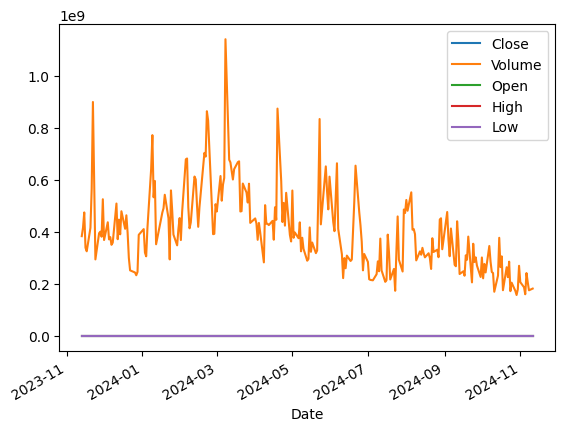

In [ ]:
nvda.plot()

**i. Describe what you see here. Why is this a challenging graph to
interpret? What would make it easier to understand?**

*The plot displays one attribute of the NVDA stock over a year,which includes only volume. The Volume variable has a much larger range compared to the other variables, which makes the plot for Close, Open, High, and Low difficult to visualize.  The y-axis scales differ significantly across the variables, making comparisons between them problematic. The lack of  information presented creates visual clutter and confusion.*

*To improve clarity, it is essential to create separate subplots for each variable (Open, High, Low, Close, Volume).  This would allow each variable to have its own clearly scaled y-axis and would prevent visual clutter.  Adding clear labels and a title to the overall plot and each subplot would also improve readability. Using different colors or line styles for each series within each subplot will improve visual distinction.*

**b. Now, re-run the .plot() function, but this time, call that function on the
‘Close’ variable only.**


<Axes: xlabel='Date'>

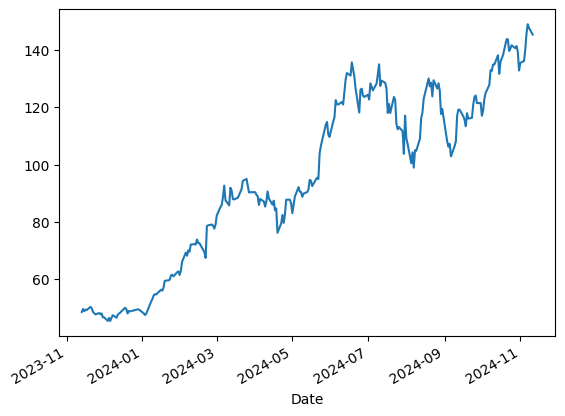

In [ ]:
nvda['Close'].plot()

**i. Now, in a couple of sentences, describe what you see. Why is
this graph more easily interpretable than the one you plotted in
the previous step?**

*The plot shows only the closing price of the NVDA stock over time.  It is easier to interpret than the previous plot because it focuses on a single variable, allowing for a clear visualization of its trend over the year without the scaling issues and visual clutter caused by plotting multiple variables with vastly different scales on the same axes.*


**c. Plotting a subset of your data**

**i. Using a slice operation, plot the daily ‘Close’ variable from your
dataset for any one-month period of your choice.**

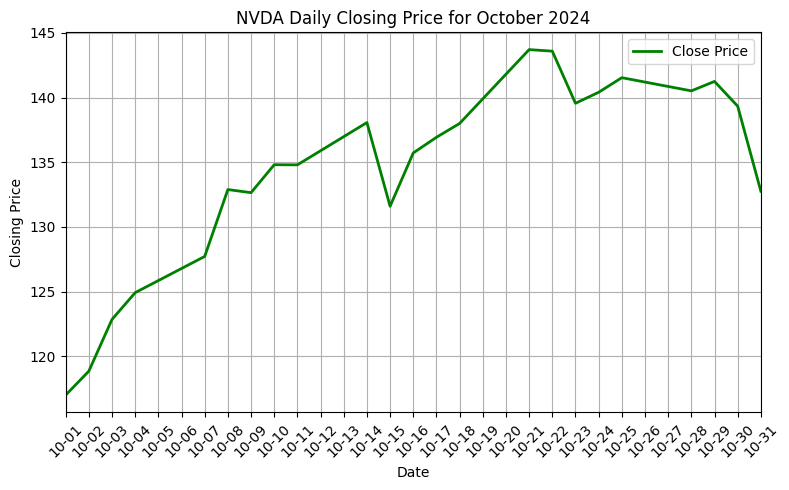

In [ ]:
nvda = nvda.sort_index()

# Slicing the data for October 2024
october_data = nvda['2024-10-01':'2024-10-31']

# Plotting the 'Close' variable for October 2024
plt.figure(figsize=(8, 5))
plt.plot(october_data.index, october_data['Close'], label='Close Price', color='Green', linestyle='-', linewidth=2)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NVDA Daily Closing Price for October 2024')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlim(pd.Timestamp('2024-10-01'), pd.Timestamp('2024-10-31'))
october_dates = pd.date_range(start='2024-10-01', end='2024-10-31')
plt.xticks(rotation=45)
plt.legend()
plt.grid (True)
plt.tight_layout()
plt.show()


**ii. Now, show the plot you drew with the previous step, but with a
new figsize, line color, and style**


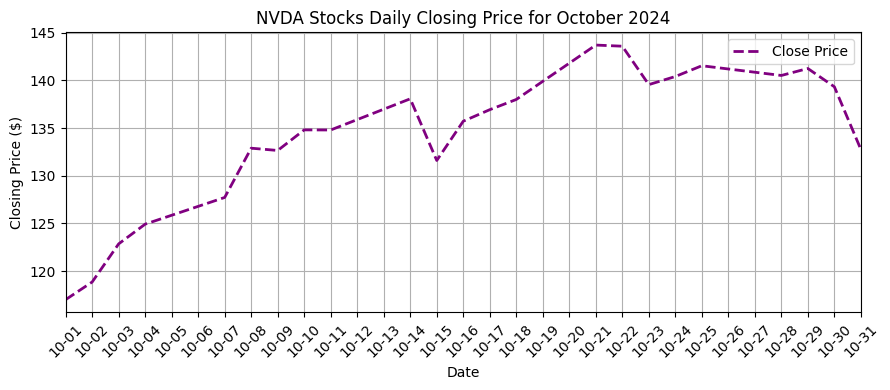

In [ ]:
# Plotting the 'Close' variable for October 2024 with new figsize, line color, and style
plt.figure(figsize=(9, 4))
plt.plot(october_data.index, october_data['Close'], label='Close Price', color='purple', linestyle='--', linewidth=2)  # Changed color and style

# Customizing the plot
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('NVDA Stocks Daily Closing Price for October 2024')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlim(pd.Timestamp('2024-10-01'), pd.Timestamp('2024-10-31'))
october_dates = pd.date_range(start='2024-10-01', end='2024-10-31')
plt.xticks(october_dates, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**G. Rolling windows**

**a. Generate a 20-period moving average for your ‘Close’ variable, and
create a plot that overlays this 20-period average atop the actual daily
closing prices.**


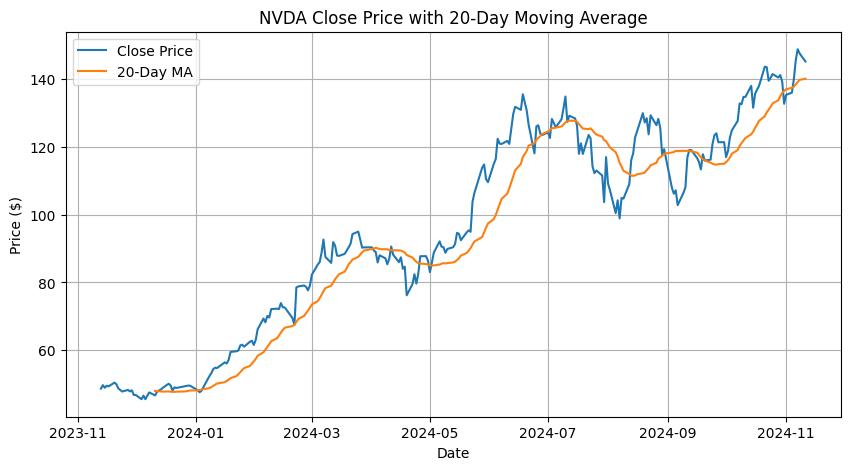

In [ ]:
# Calculating the 20-period moving average
nvda['MA20'] = nvda['Close'].rolling(window=20).mean()

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(nvda.index, nvda['Close'], label='Close Price')
plt.plot(nvda.index, nvda['MA20'], label='20-Day MA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('NVDA Close Price with 20-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

**b. Next, generate a 75-period moving average for your ‘Close’ variable, and
create a plot that overlays this 75-period average atop the actual daily
closing prices.**

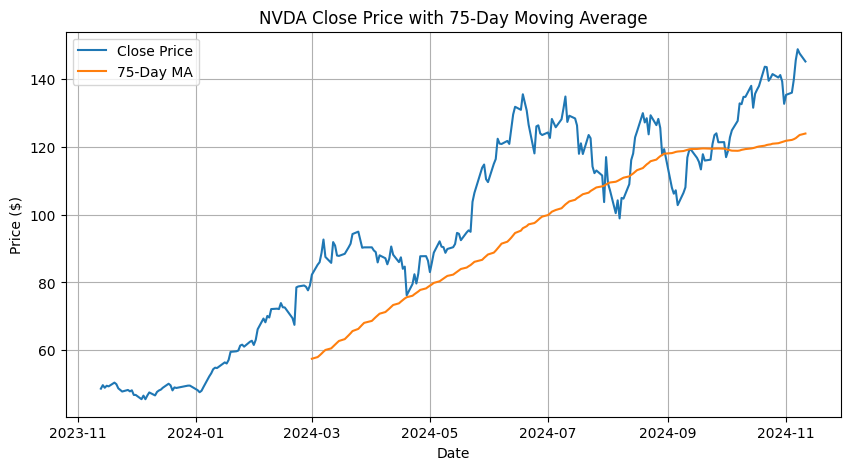

In [ ]:
# Calculating the 75-period moving average
nvda['MA75'] = nvda['Close'].rolling(window=75).mean()

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(nvda.index, nvda['Close'], label='Close Price')
plt.plot(nvda.index, nvda['MA75'], label='75-Day MA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('NVDA Close Price with 75-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

**c. How are your two moving average plots different from one another?
What are some pros and cons of shorter and longer moving average
windows?**

*The 20-day MA is more responsive to short-term price fluctuations,while the 75-day MA is smoother and less sensitive to short-term noise.The 20-day MA follows the price more closely, while the 75-day MA lags behind.*

***Shorter MA (20-day):***

*Pros:  Quickly reacts to price changes, provides more frequent trading signals.*

*Cons: More susceptible to noise and false signals, leads to more frequent trading and higher transaction costs.*

***Longer MA (75-day):***

*Pros:  Smooths out short-term noise, provides more reliable signals of long-term trends.*

*Cons:  Slower to react to price changes,misses short-term opportunities, produces fewer trading signals.*


**H. Plot a rolling standard deviation for your time series data. You should be
showing the rolling standard deviation for the ‘Close’ variable for this purpose.
You can pick the size of the window for the rolling standard deviation.**

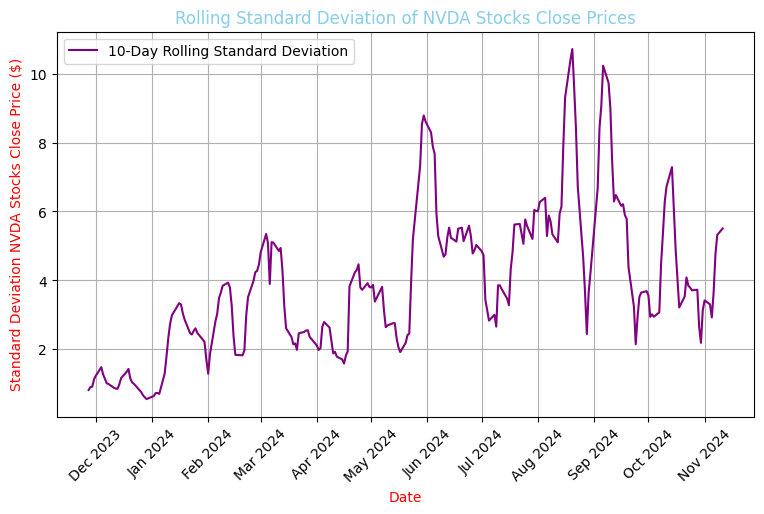

In [ ]:
# Calculating the rolling standard deviation with a window of 10 periods
nvda['Rolling_STD'] = nvda['Close'].rolling(window=10).std()

# Creating the plot
plt.figure(figsize=(9, 5))
plt.plot(nvda.index, nvda['Rolling_STD'], label='10-Day Rolling Standard Deviation', color='purple')
plt.xlabel('Date',color = "Red")
plt.ylabel('Standard Deviation NVDA Stocks Close Price ($)',color = "Red")
plt.title('Rolling Standard Deviation of NVDA Stocks Close Prices',color = "Skyblue")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

**a. What does your rolling standard deviation plot show you about your time
series? (Note: this question is asking you about your results. It’s not
asking an what a rolling standard deviation shows, in general).**

*The rolling standard deviation plot of NVDA's closing prices shows the volatility of the stock price over time.  Periods with higher standard deviation indicate greater price fluctuations and thus higher volatility, while lower standard deviations suggest more stable prices and lower volatility.  The plot reveals that volatility has varied across the observation period, with months ***June***, ***September***, and ***November*** exhibiting higher volatility than others.*

***Reason for higher volatility:***

***June 2024:***

*Stocks reached a 3 trillion dollar market cap, becoming the world's most valuable company, followed by a $540 billion decline due to valuation concerns.*

***September 2024:***

*Stock dropped nearly 10% in a day, losing $300 billion,driven by market and semiconductor industry concerns.*

***November 2024:***

*NVDA Surpassed Apple as the most valuable U.S. company, triggering more stock volatility*

***References:***

The Wall Street Journal. (2024, June 6). At $3 trillion, NVIDIA is worth more than many national stock markets. https://www.wsj.com/livecoverage/stock-market-today-dow-sp-500-nasdaq-live-06-06-2024/card/at-3-trillion-nvidia-is-worth-more-than-many-national-stock-markets-2GeEc9XOhq5iInz7ZxKs

The Wall Street Journal. (2024, September 3). NVIDIA’s stock falls by nearly 10%, erasing $300 billion in market value. https://www.wsj.com/livecoverage/stock-market-today-dow-sp-500-nasdaq-live-06-06-2024/card/at-3-trillion-nvidia-is-worth-more-than-many-national-stock-markets-2GeEc9XOhq5iInz7ZxKs

Investopedia. (2024, November). NVIDIA overtakes Apple as most valuable company in the world.  https://www.investopedia.com/nvidia-overtakes-apple-as-most-valuable-company-in-world-8731936


**I. Next, we will try something called resampling.**

**a. Resample your time series so that its values are based on quarterly time
periods’ mean values for ‘Close’, rather than daily periods.**


In [ ]:
nvda_quarterly = nvda['Close'].resample('QE').mean()
print(nvda_quarterly)

# Filtering out the quarters that are beyond the available data range
filtered_nvda_quarterly = nvda_quarterly.loc[:nvda.index.max()]
print(filtered_nvda_quarterly)


Date
2023-12-31     48.338485
2024-03-31     72.480369
2024-06-30    101.103540
2024-09-30    118.122812
2024-12-31    136.274167
Freq: QE-DEC, Name: Close, dtype: float64
Date
2023-12-31     48.338485
2024-03-31     72.480369
2024-06-30    101.103540
2024-09-30    118.122812
Freq: QE-DEC, Name: Close, dtype: float64


*Since not all data is available for the entire quarter for the last quarter in the dataset, the average is influenced by the data we have up until November 11 , 2024 , which is incomplete and not fully representative of the entire quarter.*

*To fix this I filtered resampling output to only include dates where we have complete data.*

**i. Plot this newly-resampled time series, with the dates on the
x-axis, and the Close values on the y-axis.**


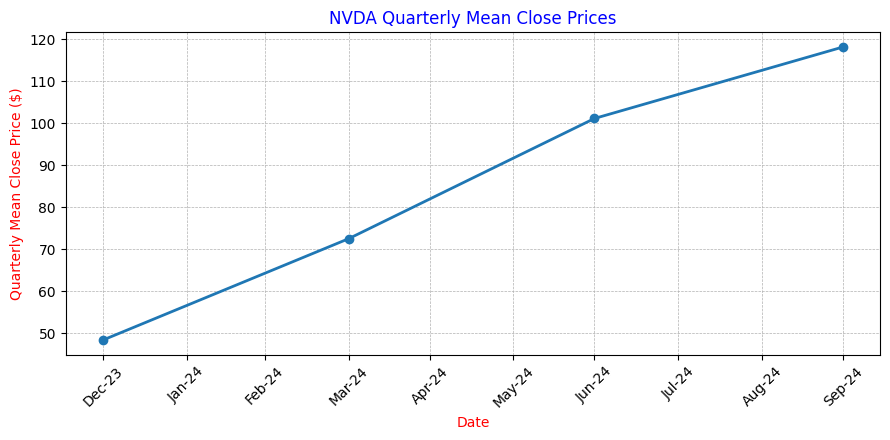

In [ ]:
# Plotting the filtered quarterly time series with better grid and x-axis ticks
plt.figure(figsize=(9, 4.5))
plt.plot(filtered_nvda_quarterly.index, filtered_nvda_quarterly.values, marker='o', linestyle='-', linewidth=2)

# Customizing the plot
plt.xlabel('Date', color="Red")
plt.ylabel('Quarterly Mean Close Price ($)', color="Red")
plt.title('NVDA Quarterly Mean Close Prices', color="Blue")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.grid(which='minor', linestyle=':', linewidth=0.5)
plt.xticks(pd.date_range(start=filtered_nvda_quarterly.index.min(), end=filtered_nvda_quarterly.index.max(), freq='ME'), rotation=45)
plt.tight_layout()
plt.show()

**ii. Provide an example that explains why someone might care about
resampling a time series. To answer this, you may use ANY other
example that you can think of, or discover, from any field that uses
time series data (health, weather, etc.) - but do not mention stock
market data for this answer, since we’ve already covered it here. You
You should also talk about the character development of Batman, Robin, and the Joker here (but don’t mention time series content in the Batman & Robin stuff - just talk about the characters)
You don’t need to perform any outside research or go too deeply
into domain knowledge here -- 3-4 thoughtful sentences are all
you need.**

*Resampling order fulfillment data helps supply chain managers to see the bigger picture by smoothing out daily ups and downs. This makes it easier to spot trends and plan ahead, ensuring better inventory management and more efficient distribution. Ultimately, companies can meet customer demand more reliably, avoid delays, excess stock, and run their supply chains more smoothly.*

# **Part II: Marketing Mix Modeling with an Interaction Term :**

**1.After reading the file into your environment, the first question that you will explore here
is whether there is any relationship between marketing spending and revenue.**

**a. To explore this, first create a new variable that shows the total spending. This
variable’s value should be the sum of web ad spending, bus stop ad spending, and
newspaper ad spending.**


In [ ]:
sch = pd.read_csv('/content/schwab_ads (1).csv')
sch.head()

,Web,Bus_Stop,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
sch['Total_Spending'] = sch['Web'] + sch['Bus_Stop'] + sch['Newspaper']
sch.head()

,Web,Bus_Stop,Newspaper,Sales,Total_Spending
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


**b. Now, find the correlation between this new total spending variable and Sales.**

**i. What is the correlation between these variables?**

In [ ]:
# Correlation between 'Total_Spending' and 'Sales'
correlation = sch['Total_Spending'].corr(sch['Sales'])

print(f"The correlation between Total Spending and Sales is: {correlation}")

The correlation between Total Spending and Sales is: 0.924917006249931


**ii. What does this correlation suggest about the relationship between total
marketing spending and sales?**

*The correlation of 0.9249 shows a very strong positive relationship between total marketing spending and sales. As total marketing spending increases, sales tend to increase as well, and vice versa. The high value indicates that changes in marketing spending are closely associated with changes in sales, implying that marketing efforts likely have a significant impact on driving sales.*

**iii. Why can’t we conclude from this that more ad spending leads to more
sales?**

*We can't conclude that more ad spending leads to more sales just because there's a strong correlation, as correlation does not mean causation. Other factors could be influencing both marketing spending and sales, like market trends or seasonal changes. There could also be reverse causation, where higher sales allow for more spending on ads, so more analysis is needed to prove direct causation.*

**c. Next, let’s explore the relationship among the web spending, bus stop ad
spending, and newspaper spending variables. Examine the correlations among
these three variables.**

                Web  Bus_Stop  Newspaper
Web        1.000000  0.054809   0.056648
Bus_Stop   0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


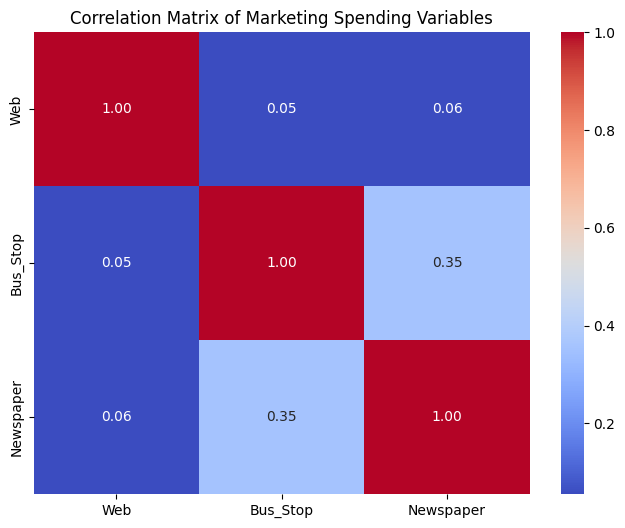

In [ ]:
correlation2 = sch[['Web', 'Bus_Stop', 'Newspaper']].corr()
print(correlation2)

# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Marketing Spending Variables')
plt.show()

**i. Are any of these correlations so high that we might not be able to use
them together in a linear model?**

*In the correlation matrix shown, none of the correlations between the variables (Web, Bus_Stop, and Newspaper) are very high. The highest correlation is 0.3541 between Bus_Stop and Newspaper, which is moderate but not strong enough to suggest multicollinearity issues that would prevent using them together in a linear model.*

*Correlations above 0.7 or 0.8 would raise concerns about multicollinearity. Since all the correlations here are much lower, it is safe to include these variables together in a linear model.*

**d. Now, build a model that uses Sales as the outcome variable, with web spending,
bus stop ad spending, and newspaper spending as the input variables. Use the
statsmodels library for this step, and all of the remaining steps here.**


In [ ]:
# Building the model
model = smf.ols('Sales ~ Web + Bus_Stop + Newspaper', data=sch).fit()

# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           8.13e-99
Time:                        21:26:55   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.0

**i. What is the p-value of the F-Statistic for this model? What does this
suggest about the model?**

The p-value for the F-Statistic is very close to zero (8.13 X 10-99), which means that the model is statistically significant. This suggests that the model does a good job of explaining the relationship between the predictor variables Web, Bus_Stop, and Newspaper and the outcome Sales. It indicates that at least one of the predictors is important for predicting sales, and the model overall is useful.

**ii. What are the p-values for each of the individual predictors used in this
model? What does this suggest about these predictors?**

*Web has a p-value of 0, and Bus Stop also has a p-value of 0. These very small p-values indicate that both predictors are statistically significant and play an important role in the model. This suggests that these variables have a strong impact on predicting sales and are valuable contributors to the model's explanatory power.*

*On the other hand, the Newspaper predictor has a p-value of 0.954, which is quite high. This indicates that it is not statistically significant and does not meaningfully contribute to predicting sales. Including the Newspaper variable in the model does not improve its predictive capability and may add unnecessary complexity. It could be considered for removal to create a more streamlined and efficient model.*

**e. Build yet another model -- this time, you will again use Sales as the outcome
variable. Your inputs will be web ad spending, bus stop ad spending, and an
interaction variable for bus stop & web ad spending.**

In [ ]:
# Interaction variable
sch['Web_Bus_Interaction'] = sch['Web'] * sch['Bus_Stop']

# Model with the interaction term
model_interaction = smf.ols('Sales ~ Web + Bus_Stop + Web_Bus_Interaction', data=sch).fit()

# Model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          3.90e-104
Time:                        21:26:55   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.1926    

**i. What do you notice about the p-values for each of these predictors?**

*The p-values for the predictors in this model indicate that all three variables are statistically significant. The Web predictor has a p-value of 0, showing it is highly significant, while Bus_Stop has a p-value of 0.005, which is also significant. The Web_Bus_Interaction variable has a p-value of 0, demonstrating strong significance as well. These results suggest that each predictor including the interaction term contributes meaningfully to explaining variations in Sales.*

**ii. How does the r-squared of this model compare to the r-squared of a
model built to predict sales, but with only bus bus stop spending and web
ad spending, but without the interaction term? What does this difference
suggest about the inclusion of the interaction? (you will need to
generate another model to answer this, but it won’t take long)**

In [ ]:
# Model without the interaction term
model_no_interaction = smf.ols('Sales ~ Web + Bus_Stop', data=sch).fit()
print(model_no_interaction.summary())

# Compare R-squared values
r_squared_interaction = model_interaction.rsquared
r_squared_no_interaction = model_no_interaction.rsquared

print(f"R-squared with interaction: {r_squared_interaction}")
print(f"R-squared without interaction: {r_squared_no_interaction}")
print(f"Difference in R-squared: {r_squared_interaction - r_squared_no_interaction}")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          2.39e-100
Time:                        21:26:55   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.0

*The R-squared for the model with the interaction term is 0.914, and for the model without it, the R-squared is 0.903. This means adding the interaction term increases the R-squared by 0.011, showing a small improvement. This means that including the interaction term helps the model explain sales a bit better by capturing the combined effect of web and bus stop ad spending, adding more value than using them separately.*

**iii. Demonstrate what your model would predict for a marketer using 130
units of web ad spending and 21 units of bus stop ad spending. What
sales outcome should this marketer expect to see?**

In [ ]:
# Create a DataFrame for the new data point.
new_data = pd.DataFrame({'Web': [130], 'Bus_Stop': [21]})

# Calculate the interaction term for the new data point.
new_data['Web_Bus_Interaction'] = new_data['Web'] * new_data['Bus_Stop']

# Predict sales using the model with the interaction term.
predicted_sales = model_interaction.predict(new_data)

print(f"Predicted sales: {predicted_sales[0]}")

Predicted sales: 13.955200686332216


In [ ]:
Predicted_sales = 4.6309 + (0.0544*130) + (0.1072*21)
Predicted_sales

13.9541